In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Import

In [ ]:
train_raw = pd.read_csv('../../CAX_LogFacies_Train_File.csv')
# test = pd.read_csv('../../CAX_LogFacies_Test_File.csv')

In [ ]:
print(train_raw.shape[0]/1100)
# print(test.shape[0]/1100)

4000.0


In [ ]:
# # Make train and vali sets from train_raw
# import random
# train_wells = np.sort(random.sample(range(0,4000), 3000))
# vali_wells = np.arange(0,4000,1)[np.isin(np.arange(0,4000,1),train_wells)==False]
# np.savetxt('trainlist.txt',train_wells, fmt='%i')
# np.savetxt('valilist.txt',vali_wells, fmt='%i')

In [ ]:
train_wells = np.loadtxt('../trainlist.txt',dtype=int)
vali_wells = np.loadtxt('../valilist.txt',dtype=int)

In [ ]:
train = train_raw.loc[np.isin(train_raw['well_id'],train_wells)]
vali = train_raw.loc[np.isin(train_raw['well_id'],vali_wells)]
print(train.shape)
print(vali.shape)

(3300000, 4)
(1100000, 4)


In [ ]:
train.head(10)

,row_id,well_id,GR,label
0,0,0,143.510000,0
1,1,0,112.790928,0
2,2,0,123.531856,0
3,3,0,111.692784,0
4,4,0,123.613712,0
5,5,0,120.414641,0
6,6,0,123.145569,0
7,7,0,114.216497,0
8,8,0,119.387425,0
9,9,0,132.728353,0


In [ ]:
vali.head(10)

,row_id,well_id,GR,label
1100,0,1,122.260000,0
1101,1,1,112.872757,0
1102,2,1,120.125514,0
1103,3,1,122.488271,0
1104,4,1,132.111028,0
1105,5,1,117.603785,0
1106,6,1,117.206542,0
1107,7,1,114.179299,0
1108,8,1,115.182056,0
1109,9,1,118.134813,0


### Data Preparation

#### Decomposing 
- Similar to moving average 
- Aims to remove high frequency noise

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
def add_trend(df, cols=['GR'], freqs=[5], model='additive'):   

    for col in cols:
        trendcols = [col+'trend'+str(freq) for freq in freqs]
        for i, freq in enumerate(freqs):
            df[trendcols[i]] = df.groupby('well_id')[col].transform(
                lambda x: seasonal_decompose(x, freq=freq, model=model).trend)
            if i == 0:
                df[trendcols[i]].fillna(df[col], inplace=True)
            else:
                df[trendcols[i]].fillna(df[trendcols[i-1]], inplace=True)
    return df

In [ ]:
train = add_trend(train, cols=['GR'], freqs=range(3, 20, 2))
vali = add_trend(vali, cols=['GR'], freqs=range(3, 20, 2))

In [ ]:
train.head(10)

,row_id,well_id,GR,label,GRtrend3,GRtrend5,GRtrend7,GRtrend9,GRtrend11,GRtrend13,GRtrend15,GRtrend17,GRtrend19
0,0,0,143.510000,0,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000
1,1,0,112.790928,0,126.610928,126.610928,126.610928,126.610928,126.610928,126.610928,126.610928,126.610928,126.610928
2,2,0,123.531856,0,116.005190,123.027856,123.027856,123.027856,123.027856,123.027856,123.027856,123.027856,123.027856
3,3,0,111.692784,0,119.612784,118.408784,122.671356,122.671356,122.671356,122.671356,122.671356,122.671356,122.671356
4,4,0,123.613712,0,118.573712,120.479712,118.486570,121.367046,121.367046,121.367046,121.367046,121.367046,121.367046
5,5,0,120.414641,0,122.391307,118.616641,119.428926,120.169085,123.070095,123.070095,123.070095,123.070095,123.070095
6,6,0,123.145569,0,119.258902,120.155569,120.742712,121.941124,121.221932,123.423261,123.423261,123.423261,123.423261
7,7,0,114.216497,0,118.916497,121.978497,123.177925,121.902052,122.563770,120.422651,122.884497,122.884497,122.884497
8,8,0,119.387425,0,122.110758,123.643425,123.115996,123.664092,120.833789,122.074348,121.318758,122.308601,122.308601
9,9,0,132.728353,0,126.951686,123.650353,124.135496,121.540575,122.885626,121.804507,121.529686,119.393647,120.426774


In [ ]:
vali.head(10)

,row_id,well_id,GR,label,GRtrend3,GRtrend5,GRtrend7,GRtrend9,GRtrend11,GRtrend13,GRtrend15,GRtrend17,GRtrend19
1100,0,1,122.260000,0,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000
1101,1,1,112.872757,0,118.419424,118.419424,118.419424,118.419424,118.419424,118.419424,118.419424,118.419424,118.419424
1102,2,1,120.125514,0,118.495514,121.971514,121.971514,121.971514,121.971514,121.971514,121.971514,121.971514,121.971514
1103,3,1,122.488271,0,124.908271,121.040271,120.666843,120.666843,120.666843,120.666843,120.666843,120.666843,120.666843
1104,4,1,132.111028,0,124.067695,121.907028,119.512457,119.336584,119.336584,119.336584,119.336584,119.336584,119.336584
1105,5,1,117.603785,0,122.307119,120.717785,119.842357,118.878230,118.047422,118.047422,118.047422,118.047422,118.047422
1106,6,1,117.206542,0,116.329876,119.256542,119.557971,118.154320,118.951997,119.334235,119.334235,119.334235,119.334235
1107,7,1,114.179299,0,115.522633,116.461299,117.253585,119.497077,119.655663,119.106992,118.609966,118.609966,118.609966
1108,8,1,115.182056,0,115.832056,114.212056,117.267771,119.288723,119.581147,118.770518,119.028056,119.242056,119.242056
1109,9,1,118.134813,0,113.224813,117.212813,117.697671,117.865925,118.309359,119.417121,119.465480,118.839519,118.677971


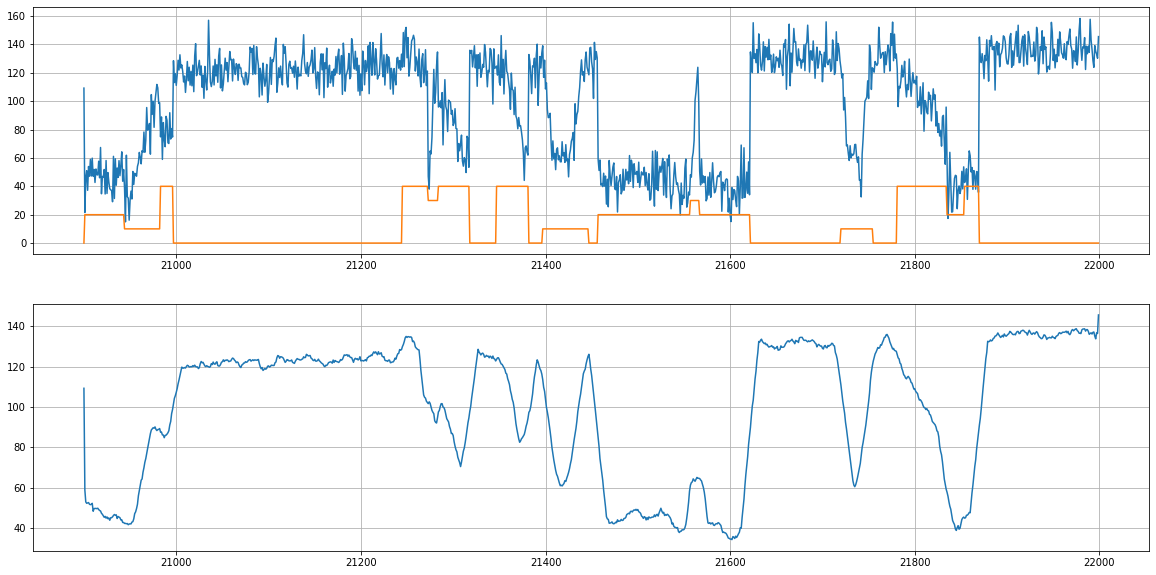

In [ ]:
well_id = 19
window = 19
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(train.loc[train.well_id==well_id,'GR'])
plt.plot(train.loc[train.well_id==well_id,'label']*10)
plt.grid()
plt.subplot(2,1,2)
plt.plot(train.loc[train.well_id==well_id,'GRtrend'+str(window)])
plt.grid()
plt.show()

#### Median Filter
- Better at preserving edges than moving average
- But worse in plateaus

In [ ]:
from scipy.signal import medfilt

In [ ]:
def add_medfilt(df, cols=['GR'], kernel_sizes=[5], replace=False):
    
    for col in cols:
        for ks in kernel_sizes:
            df[col+'medfilt'+str(ks)] = df.groupby('well_id')[col].transform(
                lambda x: medfilt(x, kernel_size=ks))

            # must be run after add_trend
            # kernel_sizes must be the same as freqs in add_trend
            if replace:
                df.loc[df.groupby('well_id').head(ks//2).index, col+'medfilt'+str(ks)
                       ] = df.loc[df.groupby('well_id').head(ks//2).index, col+'trend'+str(ks)]
                df.loc[df.groupby('well_id').tail(ks//2).index, col+'medfilt'+str(ks)
                       ] = df.loc[df.groupby('well_id').tail(ks//2).index, col+'trend'+str(ks)]
    return df

In [ ]:
train = add_medfilt(train, cols=['GR'], kernel_sizes=range(3, 20, 2), 
                    replace=True)
vali = add_medfilt(vali, cols=['GR'], kernel_sizes=range(3, 20, 2), 
                   replace=True)

In [ ]:
train.head(10)

,row_id,well_id,GR,label,GRtrend3,GRtrend5,GRtrend7,GRtrend9,GRtrend11,GRtrend13,...,GRtrend19,GRmedfilt3,GRmedfilt5,GRmedfilt7,GRmedfilt9,GRmedfilt11,GRmedfilt13,GRmedfilt15,GRmedfilt17,GRmedfilt19
0,0,0,143.510000,0,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000,...,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000
1,1,0,112.790928,0,126.610928,126.610928,126.610928,126.610928,126.610928,126.610928,...,126.610928,123.531856,126.610928,126.610928,126.610928,126.610928,126.610928,126.610928,126.610928,126.610928
2,2,0,123.531856,0,116.005190,123.027856,123.027856,123.027856,123.027856,123.027856,...,123.027856,112.790928,123.531856,123.027856,123.027856,123.027856,123.027856,123.027856,123.027856,123.027856
3,3,0,111.692784,0,119.612784,118.408784,122.671356,122.671356,122.671356,122.671356,...,122.671356,123.531856,120.414641,123.145569,122.671356,122.671356,122.671356,122.671356,122.671356,122.671356
4,4,0,123.613712,0,118.573712,120.479712,118.486570,121.367046,121.367046,121.367046,...,121.367046,120.414641,123.145569,120.414641,120.414641,121.367046,121.367046,121.367046,121.367046,121.367046
5,5,0,120.414641,0,122.391307,118.616641,119.428926,120.169085,123.070095,123.070095,...,123.070095,123.145569,120.414641,120.414641,120.414641,123.145569,123.070095,123.070095,123.070095,123.070095
6,6,0,123.145569,0,119.258902,120.155569,120.742712,121.941124,121.221932,123.423261,...,123.423261,120.414641,120.414641,120.414641,123.145569,123.145569,123.180209,123.423261,123.423261,123.423261
7,7,0,114.216497,0,118.916497,121.978497,123.177925,121.902052,122.563770,120.422651,...,122.884497,119.387425,120.414641,123.145569,123.145569,123.180209,123.145569,123.180209,122.884497,122.884497
8,8,0,119.387425,0,122.110758,123.643425,123.115996,123.664092,120.833789,122.074348,...,122.308601,119.387425,123.145569,123.145569,123.180209,123.145569,123.180209,123.145569,123.145569,122.308601
9,9,0,132.728353,0,126.951686,123.650353,124.135496,121.540575,122.885626,121.804507,...,120.426774,128.739281,123.180209,123.180209,123.145569,123.180209,123.145569,123.145569,120.414641,120.414641


In [ ]:
vali.head(10)

,row_id,well_id,GR,label,GRtrend3,GRtrend5,GRtrend7,GRtrend9,GRtrend11,GRtrend13,...,GRtrend19,GRmedfilt3,GRmedfilt5,GRmedfilt7,GRmedfilt9,GRmedfilt11,GRmedfilt13,GRmedfilt15,GRmedfilt17,GRmedfilt19
1100,0,1,122.260000,0,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000,...,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000
1101,1,1,112.872757,0,118.419424,118.419424,118.419424,118.419424,118.419424,118.419424,...,118.419424,120.125514,118.419424,118.419424,118.419424,118.419424,118.419424,118.419424,118.419424,118.419424
1102,2,1,120.125514,0,118.495514,121.971514,121.971514,121.971514,121.971514,121.971514,...,121.971514,120.125514,122.260000,121.971514,121.971514,121.971514,121.971514,121.971514,121.971514,121.971514
1103,3,1,122.488271,0,124.908271,121.040271,120.666843,120.666843,120.666843,120.666843,...,120.666843,122.488271,120.125514,120.125514,120.666843,120.666843,120.666843,120.666843,120.666843,120.666843
1104,4,1,132.111028,0,124.067695,121.907028,119.512457,119.336584,119.336584,119.336584,...,119.336584,122.488271,120.125514,117.603785,117.603785,119.336584,119.336584,119.336584,119.336584,119.336584
1105,5,1,117.603785,0,122.307119,120.717785,119.842357,118.878230,118.047422,118.047422,...,118.047422,117.603785,117.603785,117.603785,117.603785,117.603785,118.047422,118.047422,118.047422,118.047422
1106,6,1,117.206542,0,116.329876,119.256542,119.557971,118.154320,118.951997,119.334235,...,119.334235,117.206542,117.206542,117.603785,117.603785,117.603785,118.134813,119.334235,119.334235,119.334235
1107,7,1,114.179299,0,115.522633,116.461299,117.253585,119.497077,119.655663,119.106992,...,118.609966,115.182056,117.206542,117.206542,117.603785,118.134813,118.134813,118.134813,118.609966,118.609966
1108,8,1,115.182056,0,115.832056,114.212056,117.267771,119.288723,119.581147,118.770518,...,119.242056,115.182056,115.182056,117.206542,117.603785,118.134813,118.134813,118.134813,119.305842,119.242056
1109,9,1,118.134813,0,113.224813,117.212813,117.697671,117.865925,118.309359,119.417121,...,118.677971,115.182056,115.182056,117.206542,117.603785,117.603785,118.134813,119.305842,118.134813,118.134813


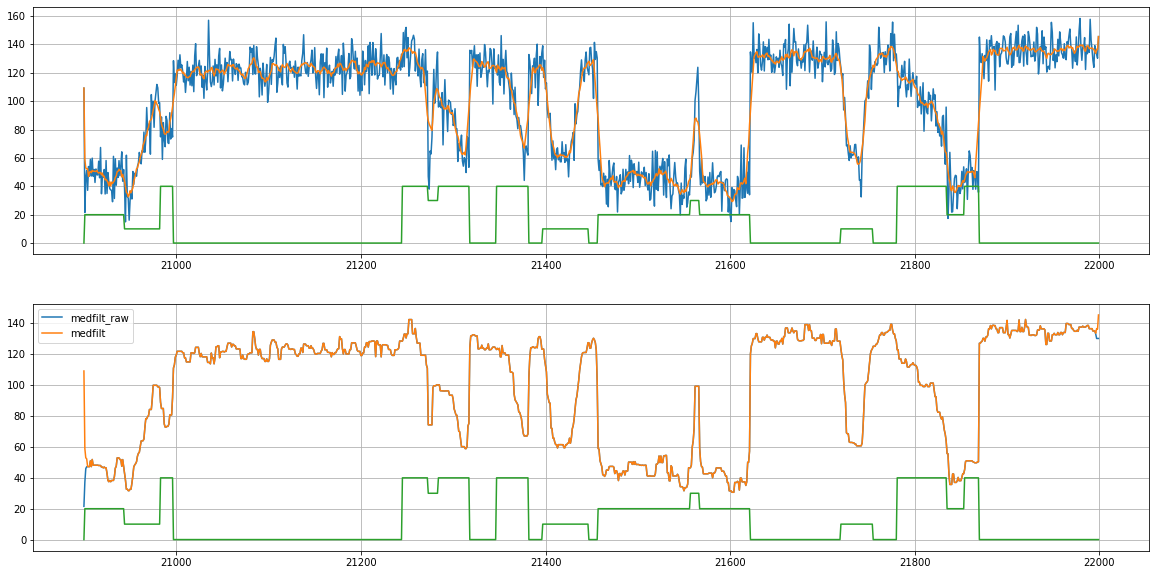

In [ ]:
well_id = 19
window = 9

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(train.loc[train['well_id']==well_id, 'GR'])
plt.plot(train.loc[train['well_id']==well_id, 'GRtrend'+str(window)], label='decompose')
plt.plot(train.loc[train['well_id']==well_id, 'label']*10)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(range(well_id*1100, (well_id+1)*1100),
         medfilt(train.loc[train['well_id'] == well_id, 'GR'], kernel_size=window), label='medfilt_raw')
plt.plot(train.loc[train['well_id']==well_id, 'GRmedfilt'+str(window)], label='medfilt')
plt.plot(train.loc[train['well_id']==well_id, 'label']*10)
plt.legend()
plt.grid()

plt.show()

#### Gradient

In [ ]:
for col in train.columns[train.columns.str.contains('trend|medfilt')]: 
    train[col+'grad'] = train.groupby('well_id')[col].transform(np.gradient)
    vali[col+'grad'] = vali.groupby('well_id')[col].transform(np.gradient)

In [ ]:
train.head(10)

,row_id,well_id,GR,label,GRtrend3,GRtrend5,GRtrend7,GRtrend9,GRtrend11,GRtrend13,...,GRtrend19grad,GRmedfilt3grad,GRmedfilt5grad,GRmedfilt7grad,GRmedfilt9grad,GRmedfilt11grad,GRmedfilt13grad,GRmedfilt15grad,GRmedfilt17grad,GRmedfilt19grad
0,0,0,143.510000,0,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000,...,-16.899072,-19.978144,-16.899072,-16.899072,-16.899072,-16.899072,-16.899072,-16.899072,-16.899072,-16.899072
1,1,0,112.790928,0,126.610928,126.610928,126.610928,126.610928,126.610928,126.610928,...,-10.241072,-15.359536,-9.989072,-10.241072,-10.241072,-10.241072,-10.241072,-10.241072,-10.241072,-10.241072
2,2,0,123.531856,0,116.005190,123.027856,123.027856,123.027856,123.027856,123.027856,...,-1.969786,0.000000,-3.098144,-1.732680,-1.969786,-1.969786,-1.969786,-1.969786,-1.969786,-1.969786
3,3,0,111.692784,0,119.612784,118.408784,122.671356,122.671356,122.671356,122.671356,...,-0.830405,3.811856,-0.193144,-1.306608,-1.306608,-0.830405,-0.830405,-0.830405,-0.830405,-0.830405
4,4,0,123.613712,0,118.573712,120.479712,118.486570,121.367046,121.367046,121.367046,...,0.199370,-0.193144,0.000000,-1.365464,-1.128358,0.237106,0.199370,0.199370,0.199370,0.199370
5,5,0,120.414641,0,122.391307,118.616641,119.428926,120.169085,123.070095,123.070095,...,1.028108,0.000000,-1.365464,0.000000,1.365464,0.889261,0.906582,1.028108,1.028108,1.028108
6,6,0,123.145569,0,119.258902,120.155569,120.742712,121.941124,121.221932,123.423261,...,-0.092799,-1.879072,0.000000,1.365464,1.365464,0.017320,0.037737,0.055057,-0.092799,-0.092799
7,7,0,114.216497,0,118.916497,121.978497,123.177925,121.902052,122.563770,120.422651,...,-0.557330,-0.513608,1.365464,1.365464,0.017320,0.000000,0.000000,-0.138846,-0.138846,-0.557330
8,8,0,119.387425,0,122.110758,123.643425,123.115996,123.664092,120.833789,122.074348,...,-1.228861,4.675928,1.382784,0.017320,0.000000,0.000000,0.000000,-0.017320,-1.234928,-1.234928
9,9,0,132.728353,0,126.951686,123.650353,124.135496,121.540575,122.885626,121.804507,...,-1.541765,4.675928,2.202784,0.017320,0.000000,0.000000,-0.017320,-1.365464,-1.365464,-0.946980


In [ ]:
vali.head(10)

,row_id,well_id,GR,label,GRtrend3,GRtrend5,GRtrend7,GRtrend9,GRtrend11,GRtrend13,...,GRtrend19grad,GRmedfilt3grad,GRmedfilt5grad,GRmedfilt7grad,GRmedfilt9grad,GRmedfilt11grad,GRmedfilt13grad,GRmedfilt15grad,GRmedfilt17grad,GRmedfilt19grad
1100,0,1,122.260000,0,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000,...,-3.840576,-2.134486,-3.840576,-3.840576,-3.840576,-3.840576,-3.840576,-3.840576,-3.840576,-3.840576
1101,1,1,112.872757,0,118.419424,118.419424,118.419424,118.419424,118.419424,118.419424,...,-0.144243,-1.067243,0.000000,-0.144243,-0.144243,-0.144243,-0.144243,-0.144243,-0.144243,-0.144243
1102,2,1,120.125514,0,118.495514,121.971514,121.971514,121.971514,121.971514,121.971514,...,1.123709,1.181379,0.853045,0.853045,1.123709,1.123709,1.123709,1.123709,1.123709,1.123709
1103,3,1,122.488271,0,124.908271,121.040271,120.666843,120.666843,120.666843,120.666843,...,-1.317465,1.181379,-1.067243,-2.183864,-2.183864,-1.317465,-1.317465,-1.317465,-1.317465,-1.317465
1104,4,1,132.111028,0,124.067695,121.907028,119.512457,119.336584,119.336584,119.336584,...,-1.309710,-2.442243,-1.260864,-1.260864,-1.531529,-1.531529,-1.309710,-1.309710,-1.309710,-1.309710
1105,5,1,117.603785,0,122.307119,120.717785,119.842357,118.878230,118.047422,118.047422,...,-0.001175,-2.640864,-1.459486,0.000000,0.000000,-0.866399,-0.600885,-0.001175,-0.001175,-0.001175
1106,6,1,117.206542,0,116.329876,119.256542,119.557971,118.154320,118.951997,119.334235,...,0.281272,-1.210864,-0.198621,-0.198621,0.000000,0.265514,0.043696,0.043696,0.281272,0.281272
1107,7,1,114.179299,0,115.522633,116.461299,117.253585,119.497077,119.655663,119.106992,...,-0.046089,-1.012243,-1.012243,-0.198621,0.000000,0.265514,0.000000,-0.599711,-0.014196,-0.046089
1108,8,1,115.182056,0,115.832056,114.212056,117.267771,119.288723,119.581147,118.770518,...,0.034003,0.000000,-1.012243,0.000000,0.000000,-0.265514,0.000000,0.585514,-0.237576,-0.237576
1109,9,1,118.134813,0,113.224813,117.212813,117.697671,117.865925,118.309359,119.417121,...,-0.426717,1.476379,1.476379,0.464136,-0.198621,-0.265514,0.000000,0.000000,-0.585514,-0.819136


#### Normalization 
- MinMaxScaler
- StandardScaler was tried but resulted in worse result
- Due to its nature, GR log should be normalized/standardized individually
- Need to check if there are any well that: 
     * contains only 0 or only 2 pattern
     * contains only 1, 3, and 4 (both 0 and 2 are absent)

In [ ]:
[print(array) 
 for array in list((train.groupby(['well_id'])['label']).unique()) 
 if len(array)<=2]

[]

In [ ]:
[print(array) 
 for array in list((vali.groupby(['well_id'])['label']).unique()) 
 if len(array)<=2]

[]

In [ ]:
[print(array) 
 for array in list((train.groupby(['well_id'])['label']).unique()) 
 if (0 not in array) and (2 not in array)]

[]

In [ ]:
[print(array)
 for array in list((vali.groupby(['well_id'])['label']).unique())
 if (0 not in array) and (2 not in array)]

[]

In [ ]:
cols = train.columns[train.columns.str.contains('GR')]
cols

Index(['GR', 'GRtrend3', 'GRtrend5', 'GRtrend7', 'GRtrend9', 'GRtrend11',
       'GRtrend13', 'GRtrend15', 'GRtrend17', 'GRtrend19', 'GRmedfilt3',
       'GRmedfilt5', 'GRmedfilt7', 'GRmedfilt9', 'GRmedfilt11', 'GRmedfilt13',
       'GRmedfilt15', 'GRmedfilt17', 'GRmedfilt19', 'GRtrend3grad',
       'GRtrend5grad', 'GRtrend7grad', 'GRtrend9grad', 'GRtrend11grad',
       'GRtrend13grad', 'GRtrend15grad', 'GRtrend17grad', 'GRtrend19grad',
       'GRmedfilt3grad', 'GRmedfilt5grad', 'GRmedfilt7grad', 'GRmedfilt9grad',
       'GRmedfilt11grad', 'GRmedfilt13grad', 'GRmedfilt15grad',
       'GRmedfilt17grad', 'GRmedfilt19grad'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import minmax_scale, scale

In [ ]:
for col in cols: 
    train[col+'norm'] = train.groupby('well_id')[col].transform(lambda x: minmax_scale(x))
    vali[col+'norm'] = vali.groupby('well_id')[col].transform(lambda x: minmax_scale(x))

In [ ]:
train.head(10)

,row_id,well_id,GR,label,GRtrend3,GRtrend5,GRtrend7,GRtrend9,GRtrend11,GRtrend13,...,GRtrend19gradnorm,GRmedfilt3gradnorm,GRmedfilt5gradnorm,GRmedfilt7gradnorm,GRmedfilt9gradnorm,GRmedfilt11gradnorm,GRmedfilt13gradnorm,GRmedfilt15gradnorm,GRmedfilt17gradnorm,GRmedfilt19gradnorm
0,0,0,143.510000,0,143.510000,143.510000,143.510000,143.510000,143.510000,143.510000,...,0.000000,0.284617,0.272098,0.286305,0.283911,0.279217,0.296668,0.330519,0.330519,0.271318
1,1,0,112.790928,0,126.610928,126.610928,126.610928,126.610928,126.610928,126.610928,...,0.220805,0.333111,0.354218,0.371249,0.370282,0.369480,0.393370,0.441365,0.441365,0.391965
2,2,0,123.531856,0,116.005190,123.027856,123.027856,123.027856,123.027856,123.027856,...,0.495112,0.494383,0.436112,0.479799,0.477581,0.481614,0.513505,0.579069,0.579069,0.541846
3,3,0,111.692784,0,119.612784,118.408784,122.671356,122.671356,122.671356,122.671356,...,0.532899,0.534406,0.470636,0.485235,0.486184,0.497061,0.530053,0.598038,0.598038,0.562493
4,4,0,123.613712,0,118.573712,120.479712,118.486570,121.367046,121.367046,121.367046,...,0.567050,0.492355,0.472931,0.484484,0.488496,0.511533,0.545010,0.615182,0.615182,0.581153
5,5,0,120.414641,0,122.391307,118.616641,119.428926,120.169085,123.070095,123.070095,...,0.594534,0.494383,0.456703,0.501905,0.520847,0.520375,0.555282,0.628979,0.628979,0.596170
6,6,0,123.145569,0,119.258902,120.155569,120.742712,121.941124,121.221932,123.423261,...,0.557360,0.474653,0.472931,0.519326,0.520847,0.508554,0.542663,0.612779,0.610318,0.575859
7,7,0,114.216497,0,118.916497,121.978497,123.177925,121.902052,122.563770,120.422651,...,0.541955,0.488990,0.489159,0.519326,0.503359,0.508319,0.542114,0.609551,0.609551,0.567441
8,8,0,119.387425,0,122.110758,123.643425,123.115996,123.664092,120.833789,122.074348,...,0.519684,0.543479,0.489364,0.502126,0.503134,0.508319,0.542114,0.611574,0.591303,0.555162
9,9,0,132.728353,0,126.951686,123.650353,124.135496,121.540575,122.885626,121.804507,...,0.509307,0.543479,0.499109,0.502126,0.503134,0.508319,0.541863,0.589130,0.589130,0.560380


In [ ]:
vali.head(10)

,row_id,well_id,GR,label,GRtrend3,GRtrend5,GRtrend7,GRtrend9,GRtrend11,GRtrend13,...,GRtrend19gradnorm,GRmedfilt3gradnorm,GRmedfilt5gradnorm,GRmedfilt7gradnorm,GRmedfilt9gradnorm,GRmedfilt11gradnorm,GRmedfilt13gradnorm,GRmedfilt15gradnorm,GRmedfilt17gradnorm,GRmedfilt19gradnorm
1100,0,1,122.260000,0,122.260000,122.260000,122.260000,122.260000,122.260000,122.260000,...,0.540633,0.626322,0.577533,0.552389,0.565094,0.548379,0.565968,0.559069,0.560512,0.557026
1101,1,1,112.872757,0,118.419424,118.419424,118.419424,118.419424,118.419424,118.419424,...,0.737645,0.638139,0.623407,0.599207,0.612988,0.598114,0.621205,0.615184,0.616772,0.615038
1102,2,1,120.125514,0,118.495514,121.971514,121.971514,121.971514,121.971514,121.971514,...,0.805226,0.663037,0.633596,0.611839,0.629417,0.615175,0.640153,0.634433,0.636070,0.634938
1103,3,1,122.488271,0,124.908271,121.040271,120.666843,120.666843,120.666843,120.666843,...,0.675113,0.663037,0.610659,0.573373,0.586560,0.582328,0.603673,0.597373,0.598915,0.596625
1104,4,1,132.111028,0,124.067695,121.907028,119.512457,119.336584,119.336584,119.336584,...,0.675527,0.622914,0.608346,0.585064,0.595013,0.579448,0.603789,0.597491,0.599033,0.596747
1105,5,1,117.603785,0,122.307119,120.717785,119.842357,118.878230,118.047422,118.047422,...,0.745271,0.620715,0.605974,0.601034,0.614857,0.588397,0.614381,0.617356,0.618949,0.617284
1106,6,1,117.206542,0,116.329876,119.256542,119.557971,118.154320,118.951997,119.334235,...,0.760325,0.636549,0.621034,0.598518,0.614857,0.603627,0.624014,0.618037,0.623248,0.621717
1107,7,1,114.179299,0,115.522633,116.461299,117.253585,119.497077,119.655663,119.106992,...,0.742877,0.638748,0.611316,0.598518,0.614857,0.603627,0.623361,0.608269,0.618751,0.616579
1108,8,1,115.182056,0,115.832056,114.212056,117.267771,119.288723,119.581147,118.770518,...,0.747146,0.649956,0.611316,0.601034,0.614857,0.596482,0.623361,0.626262,0.615351,0.613573
1109,9,1,118.134813,0,113.224813,117.212813,117.697671,117.865925,118.309359,119.417121,...,0.722590,0.666303,0.641041,0.606913,0.612284,0.596482,0.623361,0.617374,0.610055,0.604446


In [ ]:
# train.to_csv('train_dcp_mdf_grad_norm.csv', index=False)
# vali.to_csv('vali_dcp_mdf_grad_norm.csv', index=False)

#### Clustering
- K-Means clustering 
    * Several combinations of moving average and median filter with different frequencies were tried
    * Medium to low frequencies combination seems to give better 'segmentation'
- MeanShift and DBSCAN were attempted but could not be finished due to memory constraint

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# MLTM
x_cols = np.append(['GRtrend' + str(f) + 'norm' for f in range(11, 20, 4)],
                   [['GRmedfilt' + str(k) + 'norm' for k in range(11, 20, 4)],
                    ['GRtrend' + str(f) + 'gradnorm' for f in range(11, 20, 4)],
                    ['GRmedfilt' + str(k) + 'gradnorm' for k in range(11, 20, 4)]])
x_cols

array(['GRtrend11norm', 'GRtrend15norm', 'GRtrend19norm',
       'GRmedfilt11norm', 'GRmedfilt15norm', 'GRmedfilt19norm',
       'GRtrend11gradnorm', 'GRtrend15gradnorm', 'GRtrend19gradnorm',
       'GRmedfilt11gradnorm', 'GRmedfilt15gradnorm',
       'GRmedfilt19gradnorm'], dtype='<U19')

In [ ]:
kmeans = KMeans(n_clusters=6, n_init=100, max_iter=1000, random_state=42)
kmeans.fit(train[x_cols])

KMeans(max_iter=1000, n_clusters=6, n_init=100, random_state=42)

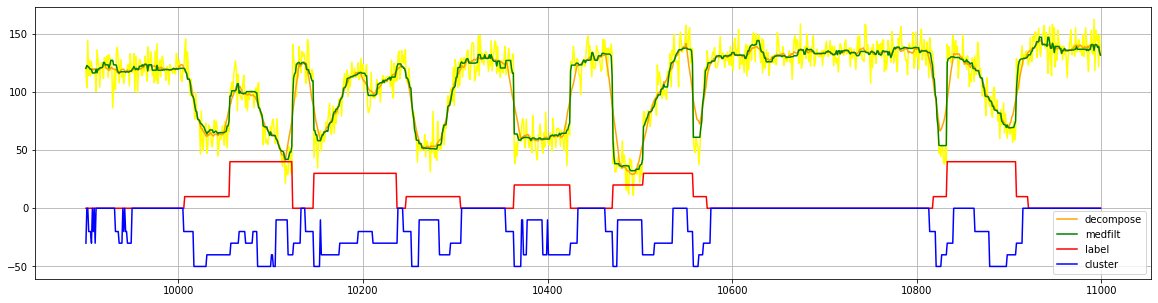

In [ ]:
well_id = 9
window = 15
train['kmeans'] = kmeans.labels_

plt.figure(figsize=(20, 5))
plt.plot(train.loc[train['well_id']==well_id, 'GR'], c='yellow')
plt.plot(train.loc[train['well_id']==well_id, 'GRtrend'+str(window)], 
         label='decompose', c='orange')
plt.plot(train.loc[train['well_id']==well_id, 'GRmedfilt'+str(window)], 
         label='medfilt', c='green')
plt.plot(train.loc[train['well_id']==well_id, 'label']*10, 
         label='label', c='red')
plt.plot(train.loc[train['well_id']==well_id, 'kmeans']*-10, 
         label='cluster', c='blue')
plt.legend()
plt.grid()

plt.show()

In [ ]:
train['kmeans_norm'] = kmeans.labels_/5
vali['kmeans_norm'] = kmeans.predict(vali[x_cols])/5

#### Reshape

In [3]:
x_cols = np.append(['GRnorm', 'kmeans_norm'], 
                   [['GRtrend' + str(f) + 'norm' for f in range(3, 20, 2)],
                   ['GRmedfilt' + str(k) + 'norm' for k in range(3, 20, 2)]])
x_cols

array(['GRnorm', 'kmeans_norm', 'GRtrend3norm', 'GRtrend5norm',
       'GRtrend7norm', 'GRtrend9norm', 'GRtrend11norm', 'GRtrend13norm',
       'GRtrend15norm', 'GRtrend17norm', 'GRtrend19norm',
       'GRmedfilt3norm', 'GRmedfilt5norm', 'GRmedfilt7norm',
       'GRmedfilt9norm', 'GRmedfilt11norm', 'GRmedfilt13norm',
       'GRmedfilt15norm', 'GRmedfilt17norm', 'GRmedfilt19norm'],
      dtype='<U15')

In [4]:
path = '/gdrive/My Drive/Colab Notebooks/CrowdAnalytix/NLe/clustering/'
train = pd.read_csv(path + 'train_dcp_mdf_grad_norm_cluster_norm.csv', 
                    usecols = np.append(x_cols,'label'))

In [5]:
x_train = train[x_cols].to_numpy()
y_train = train[['label']].to_numpy()

In [6]:
n_classes = 5
n_features = x_train.shape[1]
n_steps = 1100
n_samples = x_train.shape[0]//n_steps

In [7]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [8]:
x_train_t = x_train.reshape(n_samples, n_steps, n_features)

y_train = to_categorical(y_train, num_classes=n_classes)
y_train_t = y_train.reshape(n_samples, n_steps, n_classes)

### Bidirectional LSTM

In [12]:
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import InputLayer, LSTM, Dense, TimeDistributed, Dropout, Conv1D, GRU
from keras.layers import Bidirectional, BatchNormalization, MaxPool1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau, History, LearningRateScheduler

In [10]:
def setrandomseed(my_seed=42):
    # In order to get reproducible result, all of these random seeds must be set to fixed values.
    # 1. Set PYTHONHASHSEED environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED'] = str(my_seed)

    # 2. Set Python built-in pseudo-random generator at a fixed value
    import random
    random.seed(my_seed)

    # 3. Set NumPy pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(my_seed)

    # 4. Set the TensorFlow pseudo-random generator at a fixed value
    import tensorflow as tf
    # tf.random.set_seed(my_seed)
    # for later versions:
    tf.compat.v1.set_random_seed(my_seed)

    # 5. Configure a new global TensorFlow session (this works with TF 2.0 but crashes with 2.2)
    # from keras import backend as K
    # session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    # sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    # K.set_session(sess)
    # for later versions:
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)    

In [20]:
def plot_hist(hist, losslim=(0, 1), lrlim=(1e-10, 1e0), val=True):

    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.plot(hist.history['loss'], linewidth=2, label='Train Loss')
    if val: 
        ax1.plot(hist.history['val_loss'], linewidth=2, label='Validation Loss')
        ax1.plot(np.argmin(hist.history['val_loss']), np.min(hist.history['val_loss']), 
                 marker='x', color='red', label='model_best')
    ax1.set_xlabel('Epoch', fontsize=15)
    ax1.set_ylabel('Loss', fontsize=15)
    ax1.set_ylim(losslim)
    ax1.grid(which='major')

    ax2 = ax1.twinx()
    ax2.semilogy(hist.history['lr'], linewidth=2, c='g', label='Learning Rate')
    ax2.set_ylabel('Learning Rate', fontsize=15)
    ax2.set_ylim(lrlim)

    fig.legend(loc='upper right',
               bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
    plt.show()

#### Train 80%

In [ ]:
# del model
# K.clear_session()

In [ ]:
setrandomseed()

model = Sequential([
    # InputLayer(input_shape=(n_steps, n_features)),
    # Using InputLayer makes saved model unloadable in TF 2.0
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.2),
                  input_shape=[n_steps, n_features]),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)), 
    Dense(128, activation='relu'), 
    Dropout(0.2),
    Dense(n_classes, activation='softmax')])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1100, 256)         152576    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1100, 128)         164352    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1100, 128)         98816     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 1100, 128)         98816     
_________________________________________________________________
dense_1 (Dense)              (None, 1100, 128)         16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1100, 128)         0         
_________________________________________________________________
dense_2 (Dense)              (None, 1100, 5)          

In [ ]:
model_name = 'dcp_mdfALL_norm_kmeans_norm_lstm128_64x3_dense128_do0.2'

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20)
checkpoint = ModelCheckpoint(filepath=path+model_name+'_best.hdf5', verbose=1, 
                             save_best_only=True)
csv_logger = CSVLogger(path+'log.txt')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5,
                                            verbose=1, factor=0.5, min_lr=1e-9)
history = History()

In [ ]:
print('Train size:', x_train_t.shape[0]*0.8)

Train size: 2400.0


In [ ]:
setrandomseed()

model.fit(x_train_t, y_train_t,
          batch_size=100, epochs=1000,
          validation_split=0.2, shuffle=True, verbose=1,
          callbacks=[early_stop, checkpoint, csv_logger, learning_rate_reduction, history])

Train on 2400 samples, validate on 600 samples
Epoch 1/1000
2400/2400 [==============================] - 559s 233ms/step - loss: 1.5287 - categorical_accuracy: 0.5096 - val_loss: 1.3441 - val_categorical_accuracy: 0.5302

Epoch 00001: val_loss improved from inf to 1.34405, saving model to /gdrive/My Drive/Colab Notebooks/CrowdAnalytix/NLe/clustering/dcp_mdfALL_norm_kmeans_norm_lstm128_64x3_dense128_do0.2_best.hdf5
Epoch 2/1000
2400/2400 [==============================] - 547s 228ms/step - loss: 1.3606 - categorical_accuracy: 0.5243 - val_loss: 1.3438 - val_categorical_accuracy: 0.5302

Epoch 00002: val_loss improved from 1.34405 to 1.34384, saving model to /gdrive/My Drive/Colab Notebooks/CrowdAnalytix/NLe/clustering/dcp_mdfALL_norm_kmeans_norm_lstm128_64x3_dense128_do0.2_best.hdf5
Epoch 3/1000
2400/2400 [==============================] - 546s 227ms/step - loss: 1.3584 - categorical_accuracy: 0.5243 - val_loss: 1.3438 - val_categorical_accuracy: 0.5302

Epoch 00003: val_loss improved f

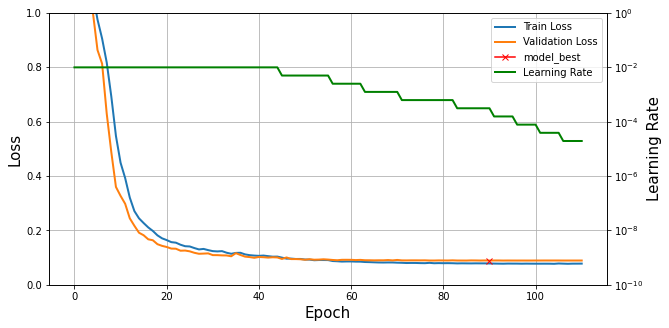

In [ ]:
plot_hist(hist=history)

In [ ]:
model.save(path+model_name+'_end.hdf5')

#### Train 100%

In [ ]:
# del model
# K.clear_session()

In [13]:
setrandomseed()

model = Sequential([
    # InputLayer(input_shape=(n_steps, n_features)),
    # Using InputLayer makes saved model unloadable in TF 2.0
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.2),
                  input_shape=[n_steps, n_features]),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)), 
    Dense(128, activation='relu'), 
    Dropout(0.2),
    Dense(n_classes, activation='softmax')])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1100, 256)         152576    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1100, 128)         164352    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1100, 128)         98816     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 1100, 128)         98816     
_________________________________________________________________
dense_1 (Dense)              (None, 1100, 128)         16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1100, 128)         0         
_________________________________________________________________
dense_2 (Dense)              (None, 1100, 5)          

In [15]:
model_name = 'dcp_mdfALL_norm_kmeans_norm_lstm128_64x3_dense128_do0.2'

In [16]:
def lr_sched(epoch, lr): 
  if epoch < 45: 
    lr = lr
  elif epoch < 56: 
    lr = 0.005
  elif epoch < 63: 
    lr = 0.0025
  elif epoch < 71: 
    lr = 0.00125
  elif epoch < 83: 
    lr = 0.000625
  else: 
    lr = 0.0003125
  return lr

history = History()

In [17]:
print('Train size:', x_train_t.shape[0])

Train size: 3000


In [18]:
setrandomseed()

model.fit(x_train_t, y_train_t, 
          batch_size=125, epochs=91, shuffle=True, verbose=1,
          callbacks=[LearningRateScheduler(lr_sched), history])

Epoch 1/91
3000/3000 [==============================] - 362s 121ms/step - loss: 1.5126 - categorical_accuracy: 0.5072
Epoch 2/91
3000/3000 [==============================] - 358s 119ms/step - loss: 1.3601 - categorical_accuracy: 0.5255
Epoch 3/91
3000/3000 [==============================] - 358s 119ms/step - loss: 1.3561 - categorical_accuracy: 0.5255
Epoch 4/91
3000/3000 [==============================] - 356s 119ms/step - loss: 1.3546 - categorical_accuracy: 0.5255
Epoch 5/91
3000/3000 [==============================] - 353s 118ms/step - loss: 1.2942 - categorical_accuracy: 0.5270
Epoch 6/91
3000/3000 [==============================] - 355s 118ms/step - loss: 0.9940 - categorical_accuracy: 0.6301
Epoch 7/91
3000/3000 [==============================] - 356s 119ms/step - loss: 0.8920 - categorical_accuracy: 0.6490
Epoch 8/91
3000/3000 [==============================] - 352s 117ms/step - loss: 0.7839 - categorical_accuracy: 0.6821
Epoch 9/91
3000/3000 [==============================] - 

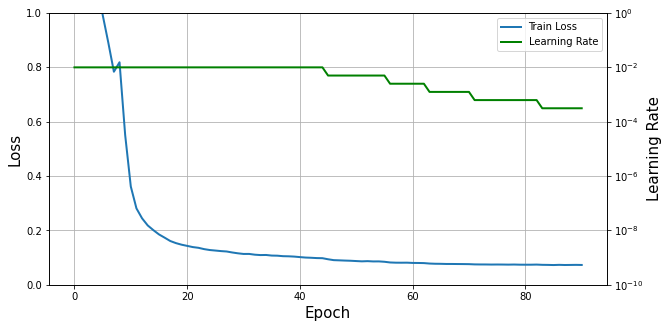

In [21]:
plot_hist(hist=history, val=False)

In [22]:
model.save(model_name+'_all.hdf5')

### Validation/Test

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
vali = pd.read_csv(path + 'vali_dcp_mdf_grad_norm_cluster_norm.csv', 
                   usecols = np.append(x_cols,'label'))

In [25]:
x_vali = vali[x_cols].to_numpy()
y_vali = vali[['label']].to_numpy()

In [26]:
def accuracy(model, n_steps, n_features, x_vali=x_vali, y_vali=y_vali): 
    
    n_samples_vali = x_vali.shape[0]//n_steps
    x_vali_t = x_vali.reshape(n_samples_vali, n_steps, n_features)
    
    model = load_model(model)
    y_pred_t = model.predict(x_vali_t)
    y_pred = y_pred_t.reshape(-1, n_classes)
    y_pred = np.argmax(y_pred, axis=1).reshape(-1,1)
    
    print('Accuracy: ', accuracy_score(y_vali, y_pred))
    print(confusion_matrix(y_vali, y_pred))
    
    return y_pred

In [ ]:
_ = accuracy(path+model_name+'_best.hdf5', n_steps, n_features)

Accuracy:  0.9693636363636363
[[573642   1470     10   1961   1970]
 [  2037 120709   1731   2547   1331]
 [     7   1911 125052   1216   1293]
 [  3212   3127   1516 126885    760]
 [  3167   1960   1595    879 120012]]


In [ ]:
_ = accuracy(path+model_name+'_end.hdf5', n_steps, n_features)

Accuracy:  0.9693245454545455
[[573795   1448     10   1954   1846]
 [  2065 120807   1736   2443   1304]
 [     7   1970 125014   1200   1288]
 [  3244   3252   1525 126749    730]
 [  3259   2005   1572    885 119892]]


In [27]:
_ = accuracy(model_name+'_all.hdf5', n_steps, n_features)

Accuracy:  0.9692890909090909
[[573930   1377      7   1807   1932]
 [  2087 120515   1823   2605   1325]
 [     8   1873 125149   1193   1256]
 [  3738   2931   1529 126574    728]
 [  3215   1843   1616    889 120050]]
